#PROJECT5_CAR-CSVFILE

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [14]:
data = pd.read_csv("/content/sample_data/car.csv.zip")
data.head(1)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5


In [15]:
print(data.columns)

Index(['ID', 'Name', 'Price', 'Brand', 'Model', 'Variant', 'Series', 'Year',
       'Kilometers', 'Type', 'Gearbox', 'Fuel', 'Status', 'CC', 'Color',
       'Seating Capacity'],
      dtype='object')


In [16]:
print(data.shape)
data.isnull().sum()

(17048, 16)


,0
ID,0
Name,0
Price,0
Brand,0
Model,0
Variant,0
Series,0
Year,0
Kilometers,0
Type,0


#1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?

In [17]:
#1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?
data1 = data[["Brand","Price"]].value_counts().reset_index()
data1.head()

,Brand,Price,count
0,Toyota,39990,37
1,Toyota,29990,37
2,Toyota,34990,34
3,Holden,12990,29
4,Toyota,32990,28


In [20]:
#average price
average = data.groupby("Brand")["Price"].mean().reset_index()
sorted = average.sort_values(by='Price', ascending=False)

# Find the brand with the highest and lowest average prices
highest = sorted.iloc[0]
lowest = sorted.iloc[-1]

print(f"{highest['Brand']} Brand car with highest average price is {highest['Price']}")
print(f"{lowest['Brand']} Brand car with lowest average price is {lowest['Price']}")

Lamborghini Brand car with highest average price is 452923.3333333333
Saab Brand car with lowest average price is 8435.0


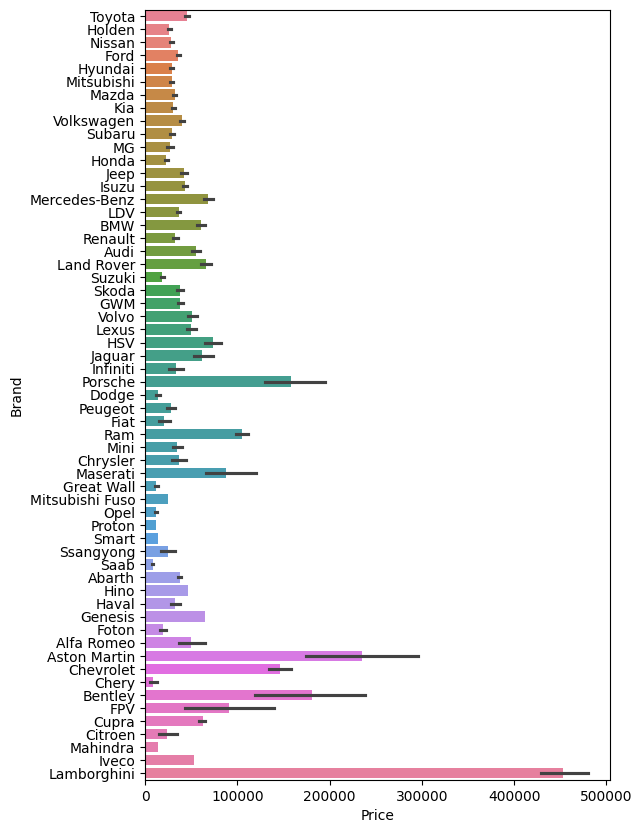

In [22]:
plt.figure(figsize = (6,10))
sn.barplot(data = data1,x = "Price",y = "Brand",hue = "Brand")
plt.show()

#2) How does the condition of a car (Status) affect its price?

In [23]:
#2) How does the condition of a car (Status) affect its price?

#df = data.groupby("Name")[["Status","Price"]].sum().reset_index()
df = data[["Status","Price"]].value_counts().reset_index()
df1 = df
df1

,Status,Price,count
0,Used,29990,269
1,Used,39990,189
2,Used,19990,180
3,Used,34990,178
4,Used,24990,173
...,...,...,...
3800,Used,24651,1
3801,Used,24682,1
3802,Used,24688,1
3803,Used,24771,1


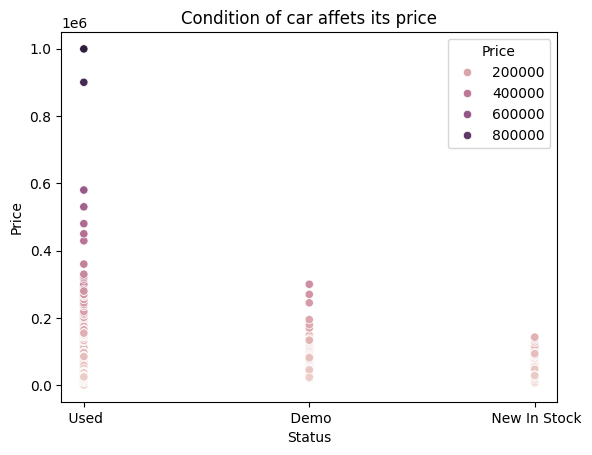

In [24]:
sn.scatterplot(data = df1,x = "Status",y = "Price",hue = "Price")
plt.title("Condition of car affets its price")
plt.show()

#3) Is there a correlation between mileage (Kilometers) and the price of a car?

In [25]:
#3) Is there a correlation between mileage (Kilometers) and the price of a car?

corr = data[["Kilometers","Price"]].corr()
corr

,Kilometers,Price
Kilometers,1.00000,-0.44749
Price,-0.44749,1.00000


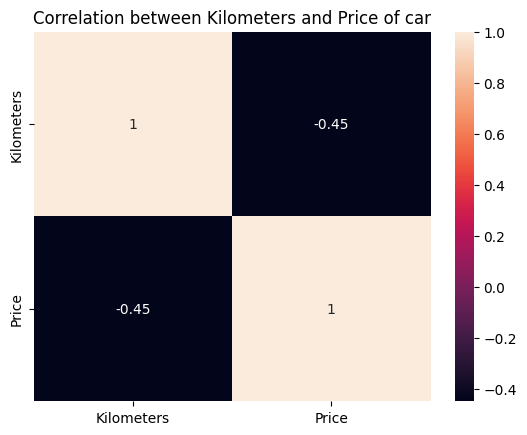

In [26]:
#heatmap plotting using correlation

sn.heatmap(corr,annot= True)
plt.title("Correlation between Kilometers and Price of car")
plt.show()

#4) How does engine capacity (CC) relate to car price and mileage?

In [27]:
#4) How does engine capacity (CC) relate to car price and mileage?
#-->a)CC,Price

df1 = data[["CC","Price"]].value_counts().reset_index()
df2 = df1
df2

,CC,Price,count
0,1999,22990,28
1,1999,28990,25
2,1999,27990,22
3,1999,24990,21
4,1999,26990,20
...,...,...,...
11915,1998,63890,1
11916,1998,63900,1
11917,1998,63999,1
11918,1998,64500,1


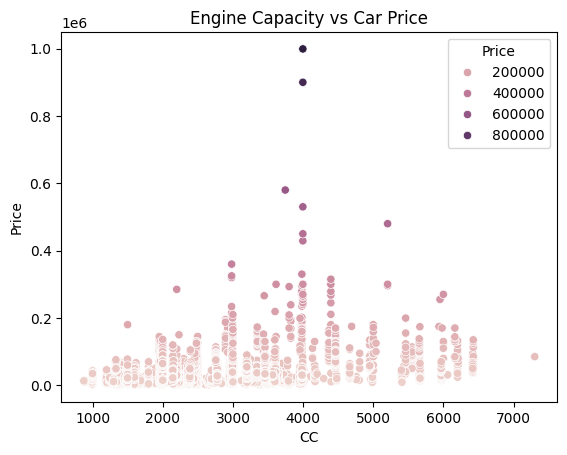

In [28]:
sn.scatterplot(data=df2, x="CC", y="Price",hue = "Price")
plt.title('Engine Capacity vs Car Price')
plt.show()

In [ ]:
#--b)CC,Kilometers

df1 = data[["CC","Kilometers"]].value_counts().reset_index()
df2 = df1
df2

,CC,Kilometers,count
0,2488,10,25
1,1998,10,16
2,1996,10,15
3,1984,15,13
4,1333,8,12
...,...,...,...
16600,1998,19000,1
16601,1998,19009,1
16602,1998,19215,1
16603,1998,19400,1


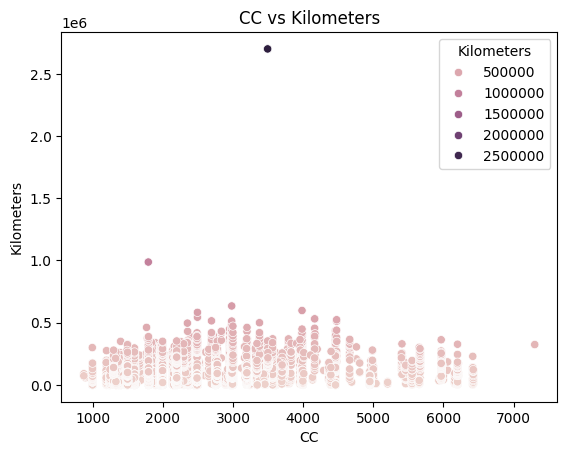

In [ ]:
sn.scatterplot(data=df2,x = "CC",y = "Kilometers",hue = "Kilometers")
plt.title("CC vs Kilometers")
plt.show()

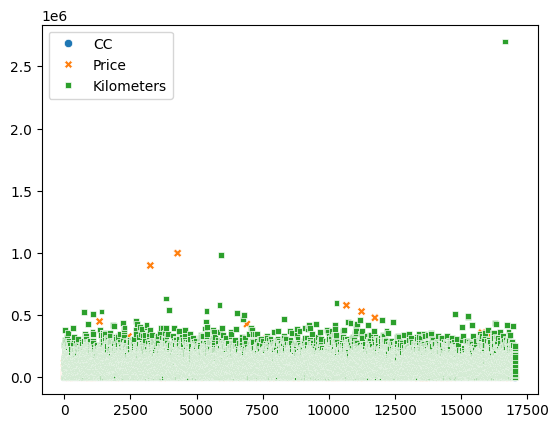

In [ ]:
sn.scatterplot(data[['CC', 'Price', 'Kilometers']])
plt.show()

In [ ]:
# correlation between Engine Capacity, Price and Mileage
corr = data[['CC', 'Price', 'Kilometers']].corr()
corr

,CC,Price,Kilometers
CC,1.000000,0.298205,0.185219
Price,0.298205,1.000000,-0.447490
Kilometers,0.185219,-0.447490,1.000000


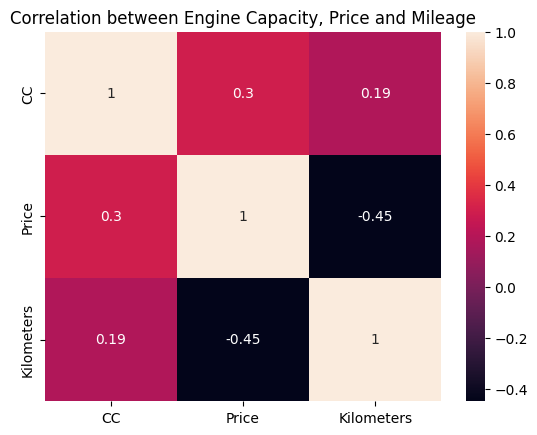

In [ ]:
#heatmap plotting using correlation

sn.heatmap(corr, annot=True)
plt.title("Correlation between Engine Capacity, Price and Mileage")
plt.show()
